In [202]:
import pandas as pd
import numpy as np

In [203]:
# chargement de données, suppression "endYear" 
data_title_basics = pd.read_csv('title.basics.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))
title_basics = data_title_basics.drop(['endYear'], axis=1)
title_basics.info()

C:\Users\phili\AppData\Local\Temp\ipykernel_14136\3519201361.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_title_basics = pd.read_csv('title.basics.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11268596 entries, 0 to 11268595
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   runtimeMinutes  object 
 7   genres          object 
dtypes: float64(2), object(6)
memory usage: 687.8+ MB


In [204]:
# sélection des films à partir des années 1990
# title_basics = title_basics[title_basics['startYear'] > '1889-12-31']
# title_basics['startYear'].info()

In [205]:
# vérifier les valeurs manquantes
title_basics.isnull().sum()

tconst                  0
titleType               0
primaryTitle           19
originalTitle          19
isAdult                 1
startYear         1417152
runtimeMinutes    7710785
genres             501560
dtype: int64

In [206]:
# modifier le type de données
title_basics['startYear'] = pd.to_datetime(title_basics['startYear'], format = '%Y')

In [207]:
# conserver uniquement les films jusque 2024
title_basics = title_basics[title_basics['startYear'] <= '2024-12-31']
title_basics['startYear'].max()

Timestamp('2024-01-01 00:00:00')

In [208]:
title_basics['titleType'].value_counts()

titleType
tvEpisode       7409895
short            990508
movie            594497
video            299456
tvSeries         250464
tvMovie          144774
tvMiniSeries      53993
tvSpecial         50028
videoGame         39424
tvShort           10372
tvPilot               1
Name: count, dtype: int64

In [209]:
# suppression des types pas nécessaire
title_basics = title_basics[(title_basics['titleType'] == 'short') | (title_basics['titleType'] == 'movie') |
                            (title_basics['titleType'] == 'tvSeries')]
title_basics['titleType'].value_counts()

titleType
short       990508
movie       594497
tvSeries    250464
Name: count, dtype: int64

In [210]:
# films = title_basics[(title_basics['titleType'] == 'movie') | (title_basics['titleType'] == 'short')]
# yearly_counts = films['startYear'].dt.year.value_counts().reset_index()
# yearly_counts.columns = ['Year', 'Count']


In [211]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15,10))
# plt.bar(x=yearly_counts['Year'], height=yearly_counts['Count'])
# plt.title("R�partition des films par p�riode de sortie")
# plt.show()

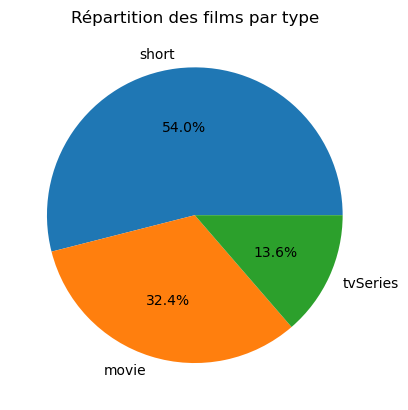

In [212]:
# répartition des films par types
import matplotlib.pyplot as plt
valeurs_uniques = title_basics['titleType'].value_counts()
plt.pie(valeurs_uniques, labels=valeurs_uniques.index, autopct='%1.1f%%')
plt.title("Répartition des films par type")
plt.show()

In [213]:
# colonnes primary et original title
title_basics['primaryTitle'].isnull().sum()


5

In [214]:
title_basics['originalTitle'].isnull().sum()

5

In [215]:
# colonne isadult : modifier le type de données
title_basics['isAdult'] = title_basics['isAdult'].astype(bool)

In [216]:
# colonne runtimeMinutes
title_basics['runtimeMinutes'] = title_basics['runtimeMinutes'].astype(float)
title_basics['runtimeMinutes'].max()

59460.0

In [217]:
# films groupes par durée
moins_30 = title_basics[title_basics['runtimeMinutes'] < 30.0]
moins_30.shape[0] #641022

entre_30_et_80 = title_basics[(title_basics['runtimeMinutes'] >= 30.0) & (title_basics['runtimeMinutes'] <= 80.0)]
entre_30_et_80.shape[0] #256025


entre_80_et_180 = title_basics[(title_basics['runtimeMinutes'] > 80.0) & (title_basics['runtimeMinutes'] <= 180.0)]
entre_80_et_180.shape[0] #281744

superieur_a_180 = title_basics[(title_basics['runtimeMinutes'] > 180.0)]
superieur_a_180.shape[0] #4238


4248

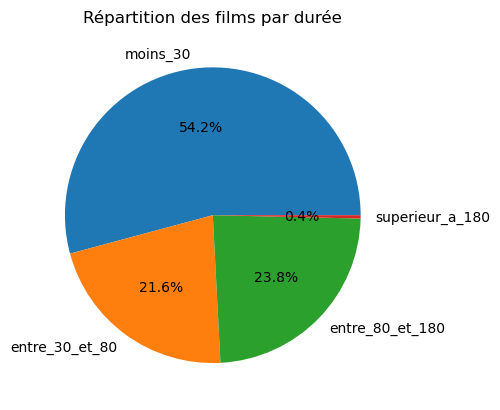

In [218]:
labels = ['moins_30', 'entre_30_et_80', 'entre_80_et_180', 'superieur_a_180']
values = [641022, 256025, 281744, 4238]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Répartition des films par durée")
plt.show()

In [219]:
# suppression des films dont la durée est supérieure à 240
title_basics = title_basics[title_basics['runtimeMinutes'] <= 240.0]
title_basics['runtimeMinutes'].max()

240.0

In [220]:
title_basics = title_basics.dropna()

In [221]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155274 entries, 0 to 11268594
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   tconst          1155274 non-null  object        
 1   titleType       1155274 non-null  object        
 2   primaryTitle    1155274 non-null  object        
 3   originalTitle   1155274 non-null  object        
 4   isAdult         1155274 non-null  bool          
 5   startYear       1155274 non-null  datetime64[ns]
 6   runtimeMinutes  1155274 non-null  float64       
 7   genres          1155274 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(5)
memory usage: 71.6+ MB


In [222]:
ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))
ratings.isnull().sum()


tconst           0
averageRating    0
numVotes         0
dtype: int64

In [223]:
merge1 = pd.merge(title_basics, ratings, how='inner', left_on='tconst', right_on='tconst')
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478908 entries, 0 to 478907
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tconst          478908 non-null  object        
 1   titleType       478908 non-null  object        
 2   primaryTitle    478908 non-null  object        
 3   originalTitle   478908 non-null  object        
 4   isAdult         478908 non-null  bool          
 5   startYear       478908 non-null  datetime64[ns]
 6   runtimeMinutes  478908 non-null  float64       
 7   genres          478908 non-null  object        
 8   averageRating   478908 non-null  float64       
 9   numVotes        478908 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 33.3+ MB


In [224]:
crew = pd.read_csv('title.crew.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))
crew.isnull().sum()


tconst             0
directors    4048745
writers      4709711
dtype: int64

In [225]:
merge2 = pd.merge(merge1, crew, how='inner', left_on='tconst', right_on='tconst')
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477718 entries, 0 to 477717
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tconst          477718 non-null  object        
 1   titleType       477718 non-null  object        
 2   primaryTitle    477718 non-null  object        
 3   originalTitle   477718 non-null  object        
 4   isAdult         477718 non-null  bool          
 5   startYear       477718 non-null  datetime64[ns]
 6   runtimeMinutes  477718 non-null  float64       
 7   genres          477718 non-null  object        
 8   averageRating   477718 non-null  float64       
 9   numVotes        477718 non-null  int64         
 10  directors       466501 non-null  object        
 11  writers         412253 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 40.5+ MB


In [226]:
merge2 = merge2.dropna()
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408930 entries, 8 to 477717
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tconst          408930 non-null  object        
 1   titleType       408930 non-null  object        
 2   primaryTitle    408930 non-null  object        
 3   originalTitle   408930 non-null  object        
 4   isAdult         408930 non-null  bool          
 5   startYear       408930 non-null  datetime64[ns]
 6   runtimeMinutes  408930 non-null  float64       
 7   genres          408930 non-null  object        
 8   averageRating   408930 non-null  float64       
 9   numVotes        408930 non-null  int64         
 10  directors       408930 non-null  object        
 11  writers         408930 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 37.8+ MB


In [227]:
principals = pd.read_csv('title.principals.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))
name_basics = pd.read_csv('name.basics.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))
tmdb_full = pd.read_csv('tmdb_full.csv', sep=',', na_values=(r'\N'), on_bad_lines='skip')

C:\Users\phili\AppData\Local\Temp\ipykernel_14136\724024398.py:3: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  tmdb_full = pd.read_csv('tmdb_full.csv', sep=',', na_values=(r'\N'), on_bad_lines='skip')


In [228]:
principals = principals.drop(['job', 'characters'], axis=1)

In [229]:
name_basics.columns

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')

In [230]:
name_basics = name_basics.drop(['deathYear', 'primaryProfession'], axis=1)

In [231]:
principals_name = pd.merge(principals, name_basics, left_on='nconst', right_on='nconst')

In [232]:
principals_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89435188 entries, 0 to 89435187
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   ordering        int64  
 2   nconst          object 
 3   category        object 
 4   primaryName     object 
 5   birthYear       float64
 6   knownForTitles  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.7+ GB


In [233]:
principals_name2 = principals_name.loc[principals_name['tconst'].isin(merge2['tconst'])]

In [234]:
principals_name2

,tconst,ordering,nconst,category,primaryName,birthYear,knownForTitles
27,tt0000009,1,nm0063086,actress,Blanche Bayliss,1878.0,tt0000009
28,tt0000009,2,nm0183823,actor,William Courtenay,1875.0,"tt0000009,tt0020355,tt0021535,tt0020403"
29,tt0000009,3,nm1309758,actor,Chauncey Depew,1834.0,"tt0000009,tt0490842,tt1076833,tt4484306"
30,tt0000009,4,nm0085156,director,Alexander Black,1859.0,tt0000009
31,tt0000009,5,nm0085156,writer,Alexander Black,1859.0,tt0000009
...,...,...,...,...,...,...,...
89434233,tt9916730,10,nm10538612,writer,Kiran Gawade,NaN,tt9916730
89434234,tt9916730,11,nm10538614,producer,Ujjwala Gawde,NaN,tt9916730
89434235,tt9916730,12,nm10538613,producer,Abhishek Jathar,NaN,tt9916730
89434236,tt9916730,13,nm1957275,cinematographer,Suresh Deshmane,NaN,"tt9777766,tt1414828,tt9244936,tt7818136"


In [235]:
principals_name2['category'].value_counts()

category
actor                  1983385
actress                1107200
writer                  631926
producer                491084
director                399567
editor                  370865
cinematographer         370809
composer                308647
self                    182079
production_designer     136608
casting_director         91176
archive_footage          15768
archive_sound              368
Name: count, dtype: int64

In [236]:
# merge2[merge2['titleType'] == 'tvSeries']

In [237]:
principals_names2 = principals_name2[(principals_name2['category'] == 'actor') | (principals_name2['category'] == 
                                                      'actress') | (principals_name2['category'] == 'director') | 
                                                      (principals_name2['category'] == 'writer')]
principals_names2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4122078 entries, 27 to 89434233
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   ordering        int64  
 2   nconst          object 
 3   category        object 
 4   primaryName     object 
 5   birthYear       float64
 6   knownForTitles  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 251.6+ MB


In [238]:
principals_names2['category'].value_counts()

category
actor       1983385
actress     1107200
writer       631926
director     399567
Name: count, dtype: int64

In [239]:
principals_names2.isna().sum()

tconst                  0
ordering                0
nconst                  0
category                0
primaryName             0
birthYear         1930953
knownForTitles       3034
dtype: int64

In [240]:
principals_names3 = principals_names2.loc[principals_names2['tconst'].isin(merge2['tconst'])]
principals_names3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4122078 entries, 27 to 89434233
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   ordering        int64  
 2   nconst          object 
 3   category        object 
 4   primaryName     object 
 5   birthYear       float64
 6   knownForTitles  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 251.6+ MB


In [241]:
principals_names3.head(5)

,tconst,ordering,nconst,category,primaryName,birthYear,knownForTitles
27,tt0000009,1,nm0063086,actress,Blanche Bayliss,1878.0,tt0000009
28,tt0000009,2,nm0183823,actor,William Courtenay,1875.0,"tt0000009,tt0020355,tt0021535,tt0020403"
29,tt0000009,3,nm1309758,actor,Chauncey Depew,1834.0,"tt0000009,tt0490842,tt1076833,tt4484306"
30,tt0000009,4,nm0085156,director,Alexander Black,1859.0,tt0000009
31,tt0000009,5,nm0085156,writer,Alexander Black,1859.0,tt0000009


In [242]:
principals_names3.shape

(4122078, 7)

In [243]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408930 entries, 8 to 477717
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tconst          408930 non-null  object        
 1   titleType       408930 non-null  object        
 2   primaryTitle    408930 non-null  object        
 3   originalTitle   408930 non-null  object        
 4   isAdult         408930 non-null  bool          
 5   startYear       408930 non-null  datetime64[ns]
 6   runtimeMinutes  408930 non-null  float64       
 7   genres          408930 non-null  object        
 8   averageRating   408930 non-null  float64       
 9   numVotes        408930 non-null  int64         
 10  directors       408930 non-null  object        
 11  writers         408930 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 37.8+ MB


In [244]:
principals_names3['tconst'].nunique()

404973

In [245]:
merge2['tconst'].nunique()

408930

In [246]:
merge3 = merge2.loc[merge2['tconst'].isin(principals_names3['tconst'])]
merge3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404973 entries, 8 to 477717
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tconst          404973 non-null  object        
 1   titleType       404973 non-null  object        
 2   primaryTitle    404973 non-null  object        
 3   originalTitle   404973 non-null  object        
 4   isAdult         404973 non-null  bool          
 5   startYear       404973 non-null  datetime64[ns]
 6   runtimeMinutes  404973 non-null  float64       
 7   genres          404973 non-null  object        
 8   averageRating   404973 non-null  float64       
 9   numVotes        404973 non-null  int64         
 10  directors       404973 non-null  object        
 11  writers         404973 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 37.5+ MB


In [247]:
merge3['startYear'] = pd.to_datetime(merge3['startYear'], format='%Y-%m-%d')

C:\Users\phili\AppData\Local\Temp\ipykernel_14136\547653943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge3['startYear'] = pd.to_datetime(merge3['startYear'], format='%Y-%m-%d')


In [248]:
merge3 = merge3[merge3['startYear'] > '1989-12-31']
merge3['startYear'].info()

<class 'pandas.core.series.Series'>
Index: 294974 entries, 3874 to 477717
Series name: startYear
Non-Null Count   Dtype         
--------------   -----         
294974 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.5 MB


In [249]:
principals_names3['category'].value_counts()

category
actor       1983385
actress     1107200
writer       631926
director     399567
Name: count, dtype: int64

In [250]:
# colonnes à conserver : 
list(tmdb_full.columns)
col_a_garder = ['budget', 'homepage', 'id', 'imdb_id', 'original_language', 'overview', 'popularity',
 'poster_path', 'production_countries', 'revenue', 'spoken_languages', 'vote_average', 'vote_count',
 'production_companies_name']

tmdb2 = tmdb_full.drop(columns=['backdrop_path', 'adult', 'genres', 'original_title', 'release_date',
       'runtime', 'status', 'tagline', 'title',
       'video', 'production_companies_country'], axis=1)
tmdb2.columns

Index(['budget', 'homepage', 'id', 'imdb_id', 'original_language', 'overview',
       'popularity', 'poster_path', 'production_countries', 'revenue',
       'spoken_languages', 'vote_average', 'vote_count',
       'production_companies_name'],
      dtype='object')

In [251]:
tmdb2.isnull().sum()

budget                            0
homepage                     265310
id                                0
imdb_id                           0
original_language                 0
overview                      27060
popularity                        0
poster_path                   45413
production_countries              0
revenue                           0
spoken_languages                  0
vote_average                      0
vote_count                        0
production_companies_name         0
dtype: int64

In [252]:
bdd_merge = pd.merge(merge3, tmdb2, how='inner', left_on='tconst', right_on='imdb_id')
bdd_merge = bdd_merge.drop(columns=['imdb_id', 'homepage'], axis=1)
bdd_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125434 entries, 0 to 125433
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   tconst                     125434 non-null  object        
 1   titleType                  125434 non-null  object        
 2   primaryTitle               125434 non-null  object        
 3   originalTitle              125434 non-null  object        
 4   isAdult                    125434 non-null  bool          
 5   startYear                  125434 non-null  datetime64[ns]
 6   runtimeMinutes             125434 non-null  float64       
 7   genres                     125434 non-null  object        
 8   averageRating              125434 non-null  float64       
 9   numVotes                   125434 non-null  int64         
 10  directors                  125434 non-null  object        
 11  writers                    125434 non-null  object  

In [253]:
bdd_merge['vote_average'].isnull().sum()

0

In [254]:
bdd_merge2 = bdd_merge.dropna()

In [255]:
bdd_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108541 entries, 0 to 125433
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   tconst                     108541 non-null  object        
 1   titleType                  108541 non-null  object        
 2   primaryTitle               108541 non-null  object        
 3   originalTitle              108541 non-null  object        
 4   isAdult                    108541 non-null  bool          
 5   startYear                  108541 non-null  datetime64[ns]
 6   runtimeMinutes             108541 non-null  float64       
 7   genres                     108541 non-null  object        
 8   averageRating              108541 non-null  float64       
 9   numVotes                   108541 non-null  int64         
 10  directors                  108541 non-null  object        
 11  writers                    108541 non-null  object       

In [256]:
bdd_merge2.isnull().sum()

tconst                       0
titleType                    0
primaryTitle                 0
originalTitle                0
isAdult                      0
startYear                    0
runtimeMinutes               0
genres                       0
averageRating                0
numVotes                     0
directors                    0
writers                      0
budget                       0
id                           0
original_language            0
overview                     0
popularity                   0
poster_path                  0
production_countries         0
revenue                      0
spoken_languages             0
vote_average                 0
vote_count                   0
production_companies_name    0
dtype: int64

In [257]:
principals_names3 = principals_names3.loc[principals_names3['tconst'].isin(bdd_merge2['tconst'])]
principals_names3['tconst'].nunique()

108541

In [258]:
principals_names3['category'].value_counts()

category
actor       571852
actress     338430
writer      190203
director    118751
Name: count, dtype: int64

In [259]:
principals_names3['tconst'].nunique()

108541

In [260]:
bdd_merge2['tconst'].nunique()

108541

In [261]:
principals_names3.tail(5)

,tconst,ordering,nconst,category,primaryName,birthYear,knownForTitles
89432984,tt9916362,9,nm3084436,actor,Asier Oruesagasti,NaN,"tt0826183,tt1060244,tt2213962,tt1267497"
89432985,tt9916362,10,nm0881986,actress,Elena Uriz,NaN,"tt14230388,tt4924942,tt11892482,tt15734582"
89432986,tt9916362,11,nm1893148,director,Pablo Agüero,1977.0,"tt2953182,tt0800964,tt1403041,tt1143153"
89432987,tt9916362,12,nm1893148,writer,Pablo Agüero,1977.0,"tt2953182,tt0800964,tt1403041,tt1143153"
89432988,tt9916362,13,nm3471432,writer,Katell Guillou,NaN,"tt9916362,tt12339398,tt33254419,tt8368232"


In [262]:
actors = principals_names3[(principals_names3['category'] == 'actor') | (principals_names3['category'] == 'actress')]
actors.head(3)

,tconst,ordering,nconst,category,primaryName,birthYear,knownForTitles
146987,tt0015724,1,nm0844752,actor,Rafael Sánchez Navarro,NaN,"tt0247969,tt0154984,tt0222593,tt2784826"
146988,tt0015724,2,nm0869732,actress,Cecilia Toussaint,1958.0,"tt3980946,tt7314988,tt0245641,tt0352599"
146989,tt0015724,3,nm0194720,actor,Miguel Córcega,1929.0,"tt0233092,tt0212641,tt0213339,tt0210426"


In [263]:
actors_name = actors.groupby('tconst')['primaryName'].apply(list).reset_index()
actors_name

,tconst,primaryName
0,tt0015724,"[Rafael Sánchez Navarro, Cecilia Toussaint, Mi..."
1,tt0035423,"[Meg Ryan, Hugh Jackman, Liev Schreiber, Breck..."
2,tt0040844,"[Edward D. Wood Jr., Duke Moore, Don Nagel, Ru..."
3,tt0050396,"[Duke Moore, Dudley Manlove, Jeannie Stevens]"
4,tt0059097,"[Peter Reusse, Anne-Kathrein Kretzschmar, Hans..."
...,...,...
100640,tt9914766,"[Inês Sá Frias, Salvador Nery]"
100641,tt9914942,"[Biel Rossell, Maria Morera, Francesca Piñón, ..."
100642,tt9916190,"[Patrick Gallagher, Akie Kotabe, Takayuki Suzu..."
100643,tt9916270,"[Sergio Castellitto, Lorenzo Richelmy, Anna Fo..."


In [264]:
actors[actors['tconst'] == 'tt0015724']

,tconst,ordering,nconst,category,primaryName,birthYear,knownForTitles
146987,tt0015724,1,nm0844752,actor,Rafael Sánchez Navarro,NaN,"tt0247969,tt0154984,tt0222593,tt2784826"
146988,tt0015724,2,nm0869732,actress,Cecilia Toussaint,1958.0,"tt3980946,tt7314988,tt0245641,tt0352599"
146989,tt0015724,3,nm0194720,actor,Miguel Córcega,1929.0,"tt0233092,tt0212641,tt0213339,tt0210426"
146990,tt0015724,4,nm0650495,actress,Regina Orozco,1964.0,"tt0117394,tt1567609,tt0015724,tt0110590"
146991,tt0015724,5,nm0941279,actor,Abel Woolrich,NaN,"tt0120746,tt0129332,tt0472043,tt0091557"
146992,tt0015724,6,nm0761055,actor,Salvador Sánchez,1943.0,"tt0421401,tt0233469,tt0213342,tt0236493"
146993,tt0015724,7,nm0670427,actor,Boris Peguero,NaN,"tt0015724,tt2803220,tt34259431,tt0109437"
146994,tt0015724,8,nm0190923,actor,Daniel Cubillo,NaN,"tt0283004,tt0455753,tt0015724,tt0285599"
146995,tt0015724,9,nm0673414,actor,Rene Pereyra,NaN,"tt0181865,tt0247196,tt2376336,tt0222868"
146996,tt0015724,10,nm0144514,actor,Óscar Castañeda,NaN,"tt0186734,tt0159930,tt0117394,tt0163561"


In [265]:
actors_order = actors.groupby('tconst')['ordering'].apply(list).reset_index()
actors_order

,tconst,ordering
0,tt0015724,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,tt0035423,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
2,tt0040844,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
3,tt0050396,"[1, 2, 3]"
4,tt0059097,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
...,...,...
100640,tt9914766,"[1, 2]"
100641,tt9914942,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
100642,tt9916190,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
100643,tt9916270,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"


In [266]:
actors2 = actors_name.merge(actors_order, on='tconst', how='left')
actors2.head(3)

,tconst,primaryName,ordering
0,tt0015724,"[Rafael Sánchez Navarro, Cecilia Toussaint, Mi...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,tt0035423,"[Meg Ryan, Hugh Jackman, Liev Schreiber, Breck...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
2,tt0040844,"[Edward D. Wood Jr., Duke Moore, Don Nagel, Ru...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"


In [267]:
movies_w_actors = bdd_merge2.merge(actors2, on='tconst', how='left')
movies_w_actors.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,popularity,poster_path,production_countries,revenue,spoken_languages,vote_average,vote_count,production_companies_name,primaryName,ordering
0,tt0015724,movie,Dama de noche,Dama de noche,False,1993-01-01,102.0,"Drama,Mystery,Romance",6.3,31,...,0.833,/zCmyAl7VG6aZJqWZ7PFfj9e6ToU.jpg,['MX'],0,[],7.000,6,['Centro de Capacitación Cinematográfica (CCC)'],"[Rafael Sánchez Navarro, Cecilia Toussaint, Mi...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,False,2001-01-01,118.0,"Comedy,Fantasy,Romance",6.4,90646,...,15.770,/mUvikzKJJSg9khrVdxK8kg3TMHA.jpg,['US'],76019048,"['en', 'fr', 'it']",6.326,1187,"['Konrad Pictures', 'Miramax']","[Meg Ryan, Hugh Jackman, Liev Schreiber, Breck...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
2,tt0040844,short,Crossroads of Laredo,Crossroads of Laredo,False,1995-01-01,30.0,"Short,Western",3.4,199,...,0.600,/atrGjxMSp6y4jvs7nojUrlsGFUb.jpg,[],0,[],2.800,5,['Wood-Thomas Pictures'],"[Edward D. Wood Jr., Duke Moore, Don Nagel, Ru...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"


In [268]:
directors = principals_names3[principals_names3['category'] == 'director']
directors.head(3)

,tconst,ordering,nconst,category,primaryName,birthYear,knownForTitles
146997,tt0015724,11,nm0529960,director,Eva López Sánchez,1954.0,"tt0151790,tt0314085,tt0015724,tt1139666"
418485,tt0035423,11,nm0003506,director,James Mangold,1963.0,"tt3315342,tt1950186,tt0358273,tt1462764"
499455,tt0040844,11,nm0000248,director,Edward D. Wood Jr.,1924.0,"tt0052077,tt0045826,tt0067479,tt0047127"


In [269]:
directors_name = directors.groupby('tconst')['primaryName'].apply(list).reset_index()
directors_name

,tconst,primaryName
0,tt0015724,[Eva López Sánchez]
1,tt0035423,[James Mangold]
2,tt0040844,[Edward D. Wood Jr.]
3,tt0050396,[Edward D. Wood Jr.]
4,tt0059097,[Frank Vogel]
...,...,...
107851,tt9914972,"[Robert Coe, Warwick Ross]"
107852,tt9915946,[Luis Ospina]
107853,tt9916190,[Fraser Precious]
107854,tt9916270,[Giacomo Cimini]


In [270]:
movies_w_directors = movies_w_actors.merge(directors_name, on='tconst', how='left')
movies_w_directors.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,...,poster_path,production_countries,revenue,spoken_languages,vote_average,vote_count,production_companies_name,primaryName_x,ordering,primaryName_y
0,tt0015724,movie,Dama de noche,Dama de noche,False,1993-01-01,102.0,"Drama,Mystery,Romance",6.3,31,...,/zCmyAl7VG6aZJqWZ7PFfj9e6ToU.jpg,['MX'],0,[],7.000,6,['Centro de Capacitación Cinematográfica (CCC)'],"[Rafael Sánchez Navarro, Cecilia Toussaint, Mi...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Eva López Sánchez]
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,False,2001-01-01,118.0,"Comedy,Fantasy,Romance",6.4,90646,...,/mUvikzKJJSg9khrVdxK8kg3TMHA.jpg,['US'],76019048,"['en', 'fr', 'it']",6.326,1187,"['Konrad Pictures', 'Miramax']","[Meg Ryan, Hugh Jackman, Liev Schreiber, Breck...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[James Mangold]
2,tt0040844,short,Crossroads of Laredo,Crossroads of Laredo,False,1995-01-01,30.0,"Short,Western",3.4,199,...,/atrGjxMSp6y4jvs7nojUrlsGFUb.jpg,[],0,[],2.800,5,['Wood-Thomas Pictures'],"[Edward D. Wood Jr., Duke Moore, Don Nagel, Ru...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Edward D. Wood Jr.]


In [271]:
movies = movies_w_directors.rename(columns= {'primaryName_x': 'actors_name', 'ordering': 'rang_acteur_film', 'primaryName_y': 'directors_name'})
movies = movies.drop(columns=['directors', 'id'], axis=1)
movies.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes',
       'writers', 'budget', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_countries', 'revenue', 'spoken_languages',
       'vote_average', 'vote_count', 'production_companies_name',
       'actors_name', 'rang_acteur_film', 'directors_name'],
      dtype='object')

In [272]:
movies['startYear'].min()

Timestamp('1990-01-01 00:00:00')

In [273]:
genres = movies.groupby('tconst')['genres'].apply(list).reset_index()
genres

,tconst,genres
0,tt0015724,"[Drama,Mystery,Romance]"
1,tt0035423,"[Comedy,Fantasy,Romance]"
2,tt0040844,"[Short,Western]"
3,tt0050396,"[Horror,Short]"
4,tt0059097,[Drama]
...,...,...
108536,tt9914972,[Documentary]
108537,tt9915946,[Documentary]
108538,tt9916190,"[Action,Adventure,Thriller]"
108539,tt9916270,[Thriller]


In [274]:
movies2 = movies.merge(genres, on='tconst', how='left')
movies2.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres_x,averageRating,numVotes,...,production_countries,revenue,spoken_languages,vote_average,vote_count,production_companies_name,actors_name,rang_acteur_film,directors_name,genres_y
0,tt0015724,movie,Dama de noche,Dama de noche,False,1993-01-01,102.0,"Drama,Mystery,Romance",6.3,31,...,['MX'],0,[],7.000,6,['Centro de Capacitación Cinematográfica (CCC)'],"[Rafael Sánchez Navarro, Cecilia Toussaint, Mi...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Eva López Sánchez],"[Drama,Mystery,Romance]"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,False,2001-01-01,118.0,"Comedy,Fantasy,Romance",6.4,90646,...,['US'],76019048,"['en', 'fr', 'it']",6.326,1187,"['Konrad Pictures', 'Miramax']","[Meg Ryan, Hugh Jackman, Liev Schreiber, Breck...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[James Mangold],"[Comedy,Fantasy,Romance]"
2,tt0040844,short,Crossroads of Laredo,Crossroads of Laredo,False,1995-01-01,30.0,"Short,Western",3.4,199,...,[],0,[],2.800,5,['Wood-Thomas Pictures'],"[Edward D. Wood Jr., Duke Moore, Don Nagel, Ru...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Edward D. Wood Jr.],"[Short,Western]"


In [275]:
movies2 = movies2.drop(columns='genres_x', axis=1)
movies2.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'writers',
       'budget', 'original_language', 'overview', 'popularity', 'poster_path',
       'production_countries', 'revenue', 'spoken_languages', 'vote_average',
       'vote_count', 'production_companies_name', 'actors_name',
       'rang_acteur_film', 'directors_name', 'genres_y'],
      dtype='object')

In [276]:
movies2 = movies2.rename(columns= {'genres_y': 'genres'})
movies2.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'writers',
       'budget', 'original_language', 'overview', 'popularity', 'poster_path',
       'production_countries', 'revenue', 'spoken_languages', 'vote_average',
       'vote_count', 'production_companies_name', 'actors_name',
       'rang_acteur_film', 'directors_name', 'genres'],
      dtype='object')

In [277]:
movies2['tconst'].nunique()

108541

In [278]:
movies2['original_language'].value_counts()

original_language
en    53658
fr     6404
es     5963
ja     4766
de     3161
      ...  
cr        1
ba        1
mg        1
lg        1
ay        1
Name: count, Length: 139, dtype: int64

In [279]:
movie3 = movies2[(movies2['original_language'] == 'fr') | (movies2['original_language'] == 'en')]
movie3['original_language'].value_counts()

original_language
en    53658
fr     6404
Name: count, dtype: int64

In [280]:
principals_names3['category'].unique()

array(['actor', 'actress', 'director', 'writer'], dtype=object)

In [281]:
movie3

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,writers,...,production_countries,revenue,spoken_languages,vote_average,vote_count,production_companies_name,actors_name,rang_acteur_film,directors_name,genres
0,tt0015724,movie,Dama de noche,Dama de noche,False,1993-01-01,102.0,6.3,31,"nm0529960,nm1597742",...,['MX'],0,[],7.000,6,['Centro de Capacitación Cinematográfica (CCC)'],"[Rafael Sánchez Navarro, Cecilia Toussaint, Mi...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Eva López Sánchez],"[Drama,Mystery,Romance]"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,False,2001-01-01,118.0,6.4,90646,"nm0737216,nm0003506",...,['US'],76019048,"['en', 'fr', 'it']",6.326,1187,"['Konrad Pictures', 'Miramax']","[Meg Ryan, Hugh Jackman, Liev Schreiber, Breck...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[James Mangold],"[Comedy,Fantasy,Romance]"
2,tt0040844,short,Crossroads of Laredo,Crossroads of Laredo,False,1995-01-01,30.0,3.4,199,"nm0298215,nm0000248",...,[],0,[],2.800,5,['Wood-Thomas Pictures'],"[Edward D. Wood Jr., Duke Moore, Don Nagel, Ru...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Edward D. Wood Jr.],"[Short,Western]"
3,tt0050396,short,Final Curtain,Final Curtain,False,2012-01-01,22.0,4.6,247,nm0000248,...,['US'],0,['en'],5.100,11,[],"[Duke Moore, Dudley Manlove, Jeannie Stevens]","[1, 2, 3]",[Edward D. Wood Jr.],"[Horror,Short]"
9,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,False,2018-01-01,122.0,6.7,8189,"nm0000080,nm0462648",...,"['FR', 'IR', 'US']",0,['en'],6.700,175,"['SACI', ""Les Films de l'Astrophore""]","[John Huston, Oja Kodar, Peter Bogdanovich, Su...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Orson Welles],[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108526,tt9909186,short,Stucco,Stucco,False,2019-01-01,18.0,5.7,566,"nm1232470,nm10535092",...,[],0,['en'],5.200,21,[],"[Janina Gavankar, Michael Ealy, Colton Haynes,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[Janina Gavankar, Russo Schelling]","[Horror,Short]"
108527,tt9909596,short,Cake Day,Cake Day,False,2020-01-01,15.0,7.2,26,nm3916458,...,[],0,['en'],8.000,2,[],"[Blair Buchholz, Joe Buffalo, Cameron Crosby, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Phillip Thomas],"[Drama,Short]"
108532,tt9913660,movie,No Apology,No Apology,False,2019-01-01,102.0,5.4,75,nm3014403,...,[],0,['en'],8.000,1,[],"[Lydia Adair, Owen Bishop, Pierce Briggs, Kiar...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Gilbert Allan],[Drama]
108536,tt9914972,movie,Blind Ambition,Blind Ambition,False,2021-01-01,96.0,7.1,315,"nm5293094,nm5292318,nm6760227,nm0743916",...,['AU'],124375,"['sn', 'fr', 'en']",7.600,5,['Third Man Films'],NaN,NaN,"[Robert Coe, Warwick Ross]",[Documentary]


In [282]:
writers = principals_names3[principals_names3['category'] == 'writer']
writers

,tconst,ordering,nconst,category,primaryName,birthYear,knownForTitles
146998,tt0015724,12,nm0529960,writer,Eva López Sánchez,1954.0,"tt0151790,tt0314085,tt0015724,tt1139666"
146999,tt0015724,13,nm1597742,writer,David Martin del Campo,1952.0,"tt0015724,tt1100057"
418486,tt0035423,12,nm0737216,writer,Steven Rogers,NaN,"tt5580036,tt0119313,tt2279339,tt0120686"
418487,tt0035423,13,nm0003506,writer,James Mangold,1963.0,"tt3315342,tt1950186,tt0358273,tt1462764"
499456,tt0040844,12,nm0000248,writer,Edward D. Wood Jr.,1924.0,"tt0052077,tt0045826,tt0067479,tt0047127"
...,...,...,...,...,...,...,...
89432681,tt9916270,12,nm1480867,writer,Giacomo Cimini,1977.0,"tt3215822,tt1433140,tt9916270,tt0819106"
89432682,tt9916270,13,nm10538402,writer,Lorenzo Collalti,NaN,tt9916270
89432683,tt9916270,14,nm5584269,writer,Alessandro Regaldo,NaN,"tt32919874,tt33074003,tt22681118,tt33074070"
89432987,tt9916362,12,nm1893148,writer,Pablo Agüero,1977.0,"tt2953182,tt0800964,tt1403041,tt1143153"


In [283]:
writers_name = writers.groupby('tconst')['primaryName'].apply(list).reset_index()
writers_name

,tconst,primaryName
0,tt0015724,"[Eva López Sánchez, David Martin del Campo]"
1,tt0035423,"[Steven Rogers, James Mangold]"
2,tt0040844,[Edward D. Wood Jr.]
3,tt0050396,[Edward D. Wood Jr.]
4,tt0059097,"[Manfred Freitag, Joachim Nestler, Dieter Scha..."
...,...,...
107569,tt9914972,"[Robert Coe, Paul Murphy, Madeleine Ross, Warw..."
107570,tt9915946,[Luis Ospina]
107571,tt9916190,[Fraser Precious]
107572,tt9916270,"[Giacomo Cimini, Lorenzo Collalti, Alessandro ..."


In [284]:
movies4 = movie3.merge(writers_name, on='tconst', how='left')
movies4.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,writers,...,revenue,spoken_languages,vote_average,vote_count,production_companies_name,actors_name,rang_acteur_film,directors_name,genres,primaryName
0,tt0015724,movie,Dama de noche,Dama de noche,False,1993-01-01,102.0,6.3,31,"nm0529960,nm1597742",...,0,[],7.000,6,['Centro de Capacitación Cinematográfica (CCC)'],"[Rafael Sánchez Navarro, Cecilia Toussaint, Mi...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Eva López Sánchez],"[Drama,Mystery,Romance]","[Eva López Sánchez, David Martin del Campo]"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,False,2001-01-01,118.0,6.4,90646,"nm0737216,nm0003506",...,76019048,"['en', 'fr', 'it']",6.326,1187,"['Konrad Pictures', 'Miramax']","[Meg Ryan, Hugh Jackman, Liev Schreiber, Breck...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[James Mangold],"[Comedy,Fantasy,Romance]","[Steven Rogers, James Mangold]"
2,tt0040844,short,Crossroads of Laredo,Crossroads of Laredo,False,1995-01-01,30.0,3.4,199,"nm0298215,nm0000248",...,0,[],2.800,5,['Wood-Thomas Pictures'],"[Edward D. Wood Jr., Duke Moore, Don Nagel, Ru...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Edward D. Wood Jr.],"[Short,Western]",[Edward D. Wood Jr.]


In [285]:
movies4.shape

(60062, 26)

In [286]:
principals_names3['tconst'].nunique()

108541

In [287]:
principals_names3 = principals_names3.loc[principals_names3['tconst'].isin(movies4['tconst'])]
principals_names3['tconst'].nunique()

60062

In [288]:
def decenni(date):
    date = str(date)
    if date < '2000-01-01':
        date = '1990'
    elif date < '2010-01-01':
        date = '2000'
    elif date < '2020-01-01':
        date = '2010'
    else: 
        date = '2020'
    return date

movies4["periode"] = movies4["startYear"].apply(decenni)
movies4.sample(5)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,writers,...,spoken_languages,vote_average,vote_count,production_companies_name,actors_name,rang_acteur_film,directors_name,genres,primaryName,periode
15333,tt0760319,movie,Night Feeders,Night Feeders,False,2006-01-01,83.0,4.6,420,nm0253953,...,['en'],3.6,8,"['Synthetic Fur Productions', 'Allumination Fi...","[Donnie Evans, Brett Gentile, Mike Monzitta, M...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Jet Eller],[Horror],[Jet Eller],2000
39219,tt2552316,movie,Sagrada: The Mystery of Creation,Sagrada: El misteri de la creació,False,2012-01-01,89.0,6.5,252,nm0369442,...,"['ca', 'en', 'fr', 'es']",5.7,3,[],"[Jordi Bonet i Armengol, Etsuro Sotoo, Anna Hu...","[1, 2, 3, 4]",[Stefan Haupt],[Documentary],[Stefan Haupt],2010
44488,tt3748354,movie,Prescient,Prescient,False,2015-01-01,81.0,5.0,74,"nm1749939,nm4495568",...,[],4.2,5,"['Beautiful River Entertainment', 'Left Hand S...","[Michael Piccirilli, Pamelyn Chee, Pamelyn Che...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",[Zi R. Lem],"[Drama,Sci-Fi,Thriller]","[Zi R. Lem, John Hannon]",2010
19112,tt10706724,movie,Afflatus,Afflatus,False,2019-01-01,59.0,7.6,10,nm10867989,...,['xx'],10.0,2,[],NaN,NaN,[Peter Kovacs],"[Horror,Mystery]",[Peter Kovacs],2010
6146,tt0160509,movie,Agnes Browne,Agnes Browne,False,1999-01-01,92.0,6.5,2252,"nm0639983,nm0326089",...,['en'],6.5,27,[],"[Anjelica Huston, Marion O'Dwyer, Niall O'Shea...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[Anjelica Huston],"[Comedy,Drama,Romance]","[Brendan O'Carroll, John Goldsmith]",1990


In [289]:
movies4['titleType'].value_counts()

titleType
movie       51239
short        8668
tvSeries      155
Name: count, dtype: int64

In [290]:
movies4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60062 entries, 0 to 60061
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tconst                     60062 non-null  object        
 1   titleType                  60062 non-null  object        
 2   primaryTitle               60062 non-null  object        
 3   originalTitle              60062 non-null  object        
 4   isAdult                    60062 non-null  bool          
 5   startYear                  60062 non-null  datetime64[ns]
 6   runtimeMinutes             60062 non-null  float64       
 7   averageRating              60062 non-null  float64       
 8   numVotes                   60062 non-null  int64         
 9   writers                    60062 non-null  object        
 10  budget                     60062 non-null  int64         
 11  original_language          60062 non-null  object        
 12  over

In [303]:
df_movies4 = movies4

def transfo_liste(x):
  import ast
  if isinstance(x, str):
     return ast.literal_eval(x)
  else:
    return x

df_movies4['genres_liste']= df_movies4['genres'].apply(transfo_liste)

In [304]:

df_movies4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60062 entries, 0 to 60061
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tconst                     60062 non-null  object        
 1   titleType                  60062 non-null  object        
 2   primaryTitle               60062 non-null  object        
 3   originalTitle              60062 non-null  object        
 4   isAdult                    60062 non-null  bool          
 5   startYear                  60062 non-null  datetime64[ns]
 6   runtimeMinutes             60062 non-null  float64       
 7   averageRating              60062 non-null  float64       
 8   numVotes                   60062 non-null  int64         
 9   writers                    60062 non-null  object        
 10  budget                     60062 non-null  int64         
 11  original_language          60062 non-null  object        
 12  over

In [293]:
 #df_movies4['genres_liste'] = df_movies4['genres_liste'].apply(lambda x: x[0].split(','))

In [294]:
# tous_les_genres = set()
# for genres in df_movies4['genres_liste']:
#   tous_les_genres.update(genres)


In [295]:
# for genre in tous_les_genres:
#   df_movies4[f'genre_{genre}'] = df_movies4['genres_liste'].apply(lambda x: genre in x)

# df_movies4

In [305]:
df_movies4.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'writers',
       'budget', 'original_language', 'overview', 'popularity', 'poster_path',
       'production_countries', 'revenue', 'spoken_languages', 'vote_average',
       'vote_count', 'production_companies_name', 'actors_name',
       'rang_acteur_film', 'directors_name', 'genres', 'primaryName',
       'periode', 'genres_liste'],
      dtype='object')

In [297]:
# verfier que c'est l'input du ml 

# df_movies4.to_csv("df_movies4.csv")

In [298]:
df_movies4['tconst'].nunique()

60062

In [299]:
# df_movies4.to_csv('df_movies.csv')

In [300]:
df_movies4['periode'].value_counts()

periode
2010    28571
2000    12896
2020    10975
1990     7620
Name: count, dtype: int64

In [306]:
df_movies4 = df_movies4.dropna()
df_movies4 = df_movies4.drop(columns=['averageRating','numVotes'], axis= 1)
df_movies4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53961 entries, 0 to 60061
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tconst                     53961 non-null  object        
 1   titleType                  53961 non-null  object        
 2   primaryTitle               53961 non-null  object        
 3   originalTitle              53961 non-null  object        
 4   isAdult                    53961 non-null  bool          
 5   startYear                  53961 non-null  datetime64[ns]
 6   runtimeMinutes             53961 non-null  float64       
 7   writers                    53961 non-null  object        
 8   budget                     53961 non-null  int64         
 9   original_language          53961 non-null  object        
 10  overview                   53961 non-null  object        
 11  popularity                 53961 non-null  float64       
 12  poster_pa

In [307]:
df_movies4.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'writers', 'budget', 'original_language',
       'overview', 'popularity', 'poster_path', 'production_countries',
       'revenue', 'spoken_languages', 'vote_average', 'vote_count',
       'production_companies_name', 'actors_name', 'rang_acteur_film',
       'directors_name', 'genres', 'primaryName', 'periode', 'genres_liste'],
      dtype='object')